In [12]:
# Step 1: Import libraries
import pandas as pd

# Load dataset (if you have CSV file locally)
# Example: dataset.csv is the downloaded UCI Banknote dataset
data = pd.read_csv("data_banknote_authentication.txt", header=None)

# Assign column names (based on dataset description)
data.columns = ["variance", "skewness", "curtosis", "entropy", "class"]

# Display first 5 rows
print(data.head())

# Check dataset info
print("\nDataset Info:")
print(data.info())

# Check class distribution
print("\nClass Distribution:")
print(data["class"].value_counts())


   variance  skewness  curtosis  entropy  class
0   3.62160    8.6661   -2.8073 -0.44699      0
1   4.54590    8.1674   -2.4586 -1.46210      0
2   3.86600   -2.6383    1.9242  0.10645      0
3   3.45660    9.5228   -4.0112 -3.59440      0
4   0.32924   -4.4552    4.5718 -0.98880      0

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB
None

Class Distribution:
class
0    762
1    610
Name: count, dtype: int64


In [15]:
import warnings
warnings.filterwarnings('ignore') # Suppress all warnings

Dataset Shape: (1372, 5)

Summary Statistics:
          variance     skewness     curtosis      entropy        class
count  1372.000000  1372.000000  1372.000000  1372.000000  1372.000000
mean      0.433735     1.922353     1.397627    -1.191657     0.444606
std       2.842763     5.869047     4.310030     2.101013     0.497103
min      -7.042100   -13.773100    -5.286100    -8.548200     0.000000
25%      -1.773000    -1.708200    -1.574975    -2.413450     0.000000
50%       0.496180     2.319650     0.616630    -0.586650     0.000000
75%       2.821475     6.814625     3.179250     0.394810     1.000000
max       6.824800    12.951600    17.927400     2.449500     1.000000


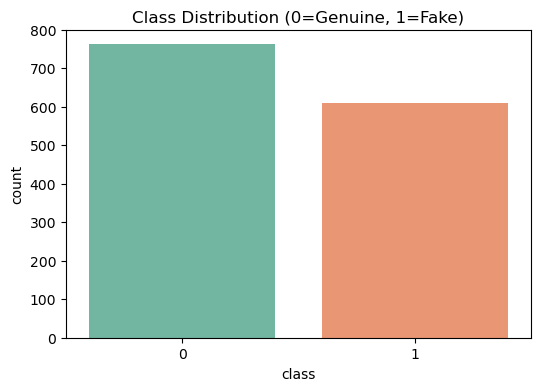

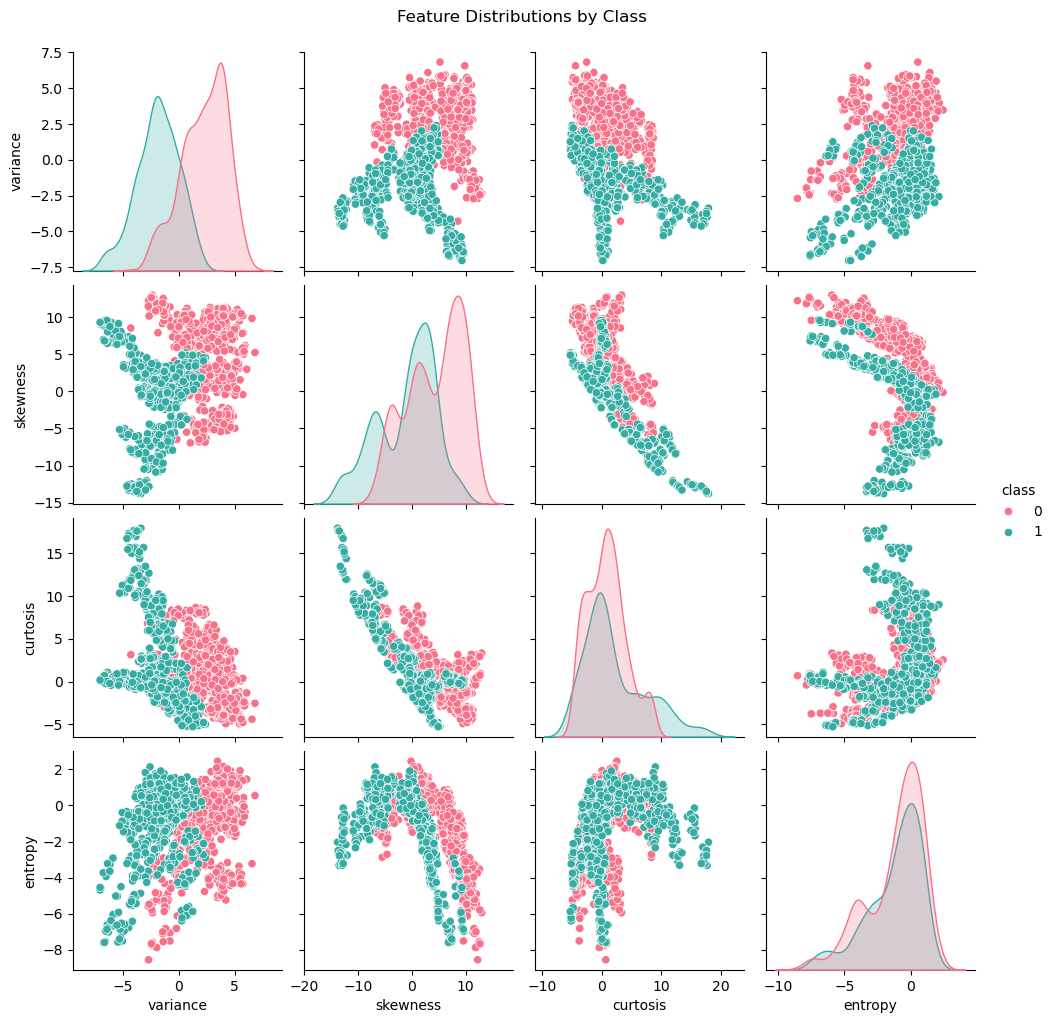

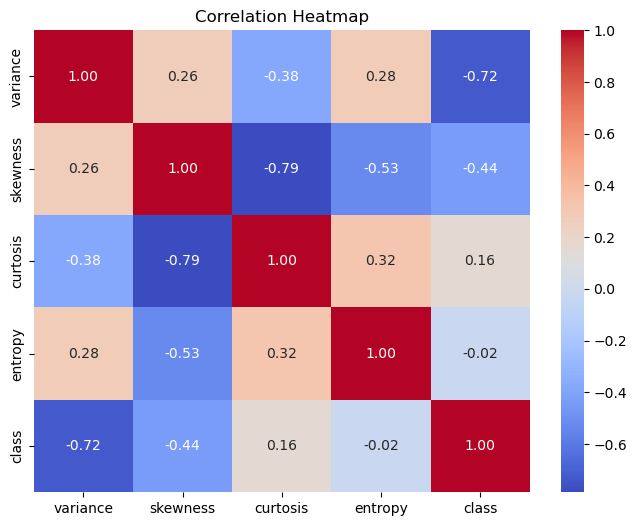

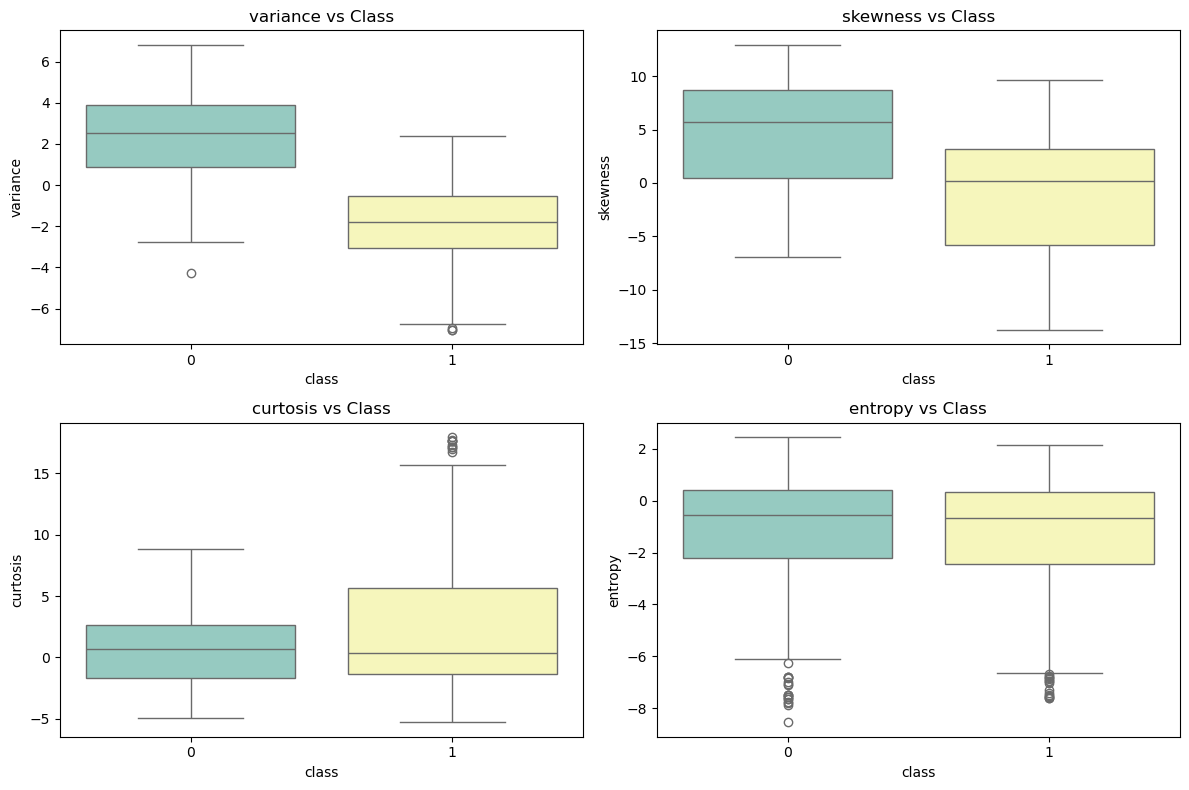

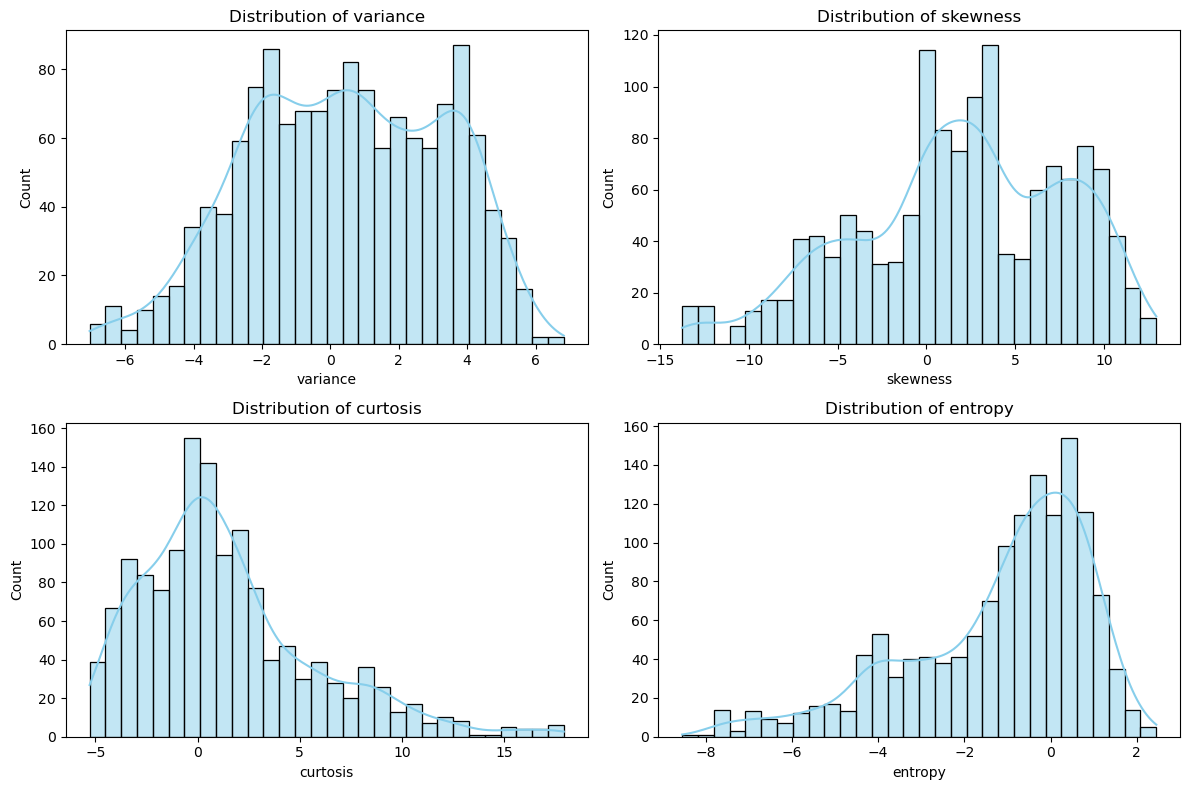

In [16]:
# Step 2: Exploratory Data Analysis (EDA)

import matplotlib.pyplot as plt
import seaborn as sns

# Basic shape of dataset
print("Dataset Shape:", data.shape)

# Summary statistics
print("\nSummary Statistics:")
print(data.describe())

# Check class distribution
plt.figure(figsize=(6,4))
sns.countplot(x="class", data=data, palette="Set2")
plt.title("Class Distribution (0=Genuine, 1=Fake)")
plt.show()

# Pairplot to see distribution of features across classes
sns.pairplot(data, hue="class", diag_kind="kde", palette="husl")
plt.suptitle("Feature Distributions by Class", y=1.02)
plt.show()

# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Boxplots to detect outliers
plt.figure(figsize=(12,8))
for i, col in enumerate(data.columns[:-1]):
    plt.subplot(2,2,i+1)
    sns.boxplot(x="class", y=col, data=data, palette="Set3")
    plt.title(f"{col} vs Class")
plt.tight_layout()
plt.show()

# Distribution plots for each feature
plt.figure(figsize=(12,8))
for i, col in enumerate(data.columns[:-1]):
    plt.subplot(2,2,i+1)
    sns.histplot(data[col], kde=True, bins=30, color="skyblue")
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separate features (X) and target (y)
X = data.drop("class", axis=1)
y = data["class"]

# Split into Train-Test (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nFirst 5 scaled feature rows:")
print(X_train_scaled[:5])


Training set shape: (1097, 4)
Testing set shape: (275, 4)

First 5 scaled feature rows:
[[ 0.39687699  0.05746643 -1.03953765  0.51951506]
 [-0.38173115 -0.22255311 -0.41215984  0.26034815]
 [ 1.25707446 -0.2779253  -0.11902626  1.13526037]
 [-0.10891208 -0.29720014 -0.70982581  0.85710298]
 [-1.1841959  -0.41950842  0.27444212  1.22779629]]


In [18]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# -------------------------------
# Linear Kernel SVM
# -------------------------------
svm_linear = SVC(kernel="linear", random_state=42)
svm_linear.fit(X_train_scaled, y_train)

y_pred_linear = svm_linear.predict(X_test_scaled)

print("🔹 Linear Kernel Results")
print("Accuracy:", accuracy_score(y_test, y_pred_linear))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_linear))
print("Classification Report:\n", classification_report(y_test, y_pred_linear))

# -------------------------------
# RBF Kernel SVM
# -------------------------------
svm_rbf = SVC(kernel="rbf", random_state=42)
svm_rbf.fit(X_train_scaled, y_train)

y_pred_rbf = svm_rbf.predict(X_test_scaled)

print("\n🔹 RBF Kernel Results")
print("Accuracy:", accuracy_score(y_test, y_pred_rbf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rbf))
print("Classification Report:\n", classification_report(y_test, y_pred_rbf))


🔹 Linear Kernel Results
Accuracy: 0.9745454545454545
Confusion Matrix:
 [[146   7]
 [  0 122]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.98       153
           1       0.95      1.00      0.97       122

    accuracy                           0.97       275
   macro avg       0.97      0.98      0.97       275
weighted avg       0.98      0.97      0.97       275


🔹 RBF Kernel Results
Accuracy: 1.0
Confusion Matrix:
 [[153   0]
 [  0 122]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       153
           1       1.00      1.00      1.00       122

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275



Best Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Best CV Accuracy: 1.0

Test Accuracy: 1.0
Confusion Matrix:
 [[153   0]
 [  0 122]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       153
           1       1.00      1.00      1.00       122

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275



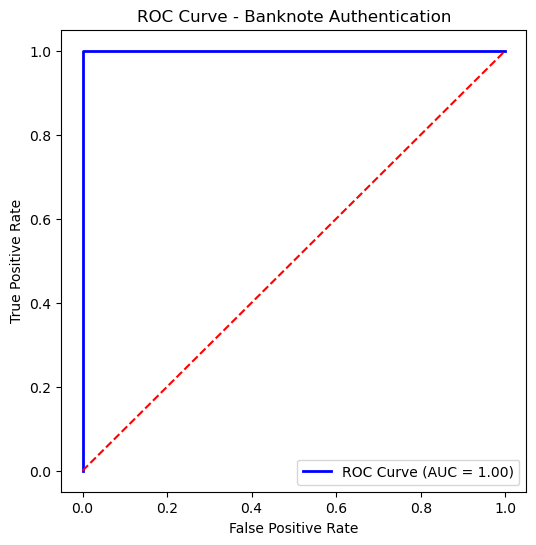

In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc

# -------------------------------
# Grid Search for best hyperparameters
# -------------------------------
param_grid = {
    "C": [0.1, 1, 10, 100],
    "gamma": [0.01, 0.1, 1, "scale"],
    "kernel": ["rbf"]
}

grid = GridSearchCV(SVC(random_state=42), param_grid, cv=5, scoring="accuracy")
grid.fit(X_train_scaled, y_train)

print("Best Parameters:", grid.best_params_)
print("Best CV Accuracy:", grid.best_score_)

# Best model
best_svm = grid.best_estimator_
y_pred_best = best_svm.predict(X_test_scaled)




print("\nTest Accuracy:", accuracy_score(y_test, y_pred_best))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best))
print("Classification Report:\n", classification_report(y_test, y_pred_best))

# -------------------------------
# ROC Curve
# -------------------------------
y_score = best_svm.decision_function(X_test_scaled)
fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color="blue", lw=2, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0,1], [0,1], color="red", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Banknote Authentication")
plt.legend(loc="lower right")
plt.show()


In [23]:


from sklearn.svm import SVC

svm = SVC(kernel="rbf", C=1, gamma="scale", probability=True, random_state=42)
svm.fit(X_train_scaled, y_train)


SVC(C=1, probability=True, random_state=42)

In [25]:
y_pred_svm = svm.predict(X_test_scaled)




print("\nTest Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))


Test Accuracy: 1.0
Confusion Matrix:
 [[153   0]
 [  0 122]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       153
           1       1.00      1.00      1.00       122

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275



In [24]:
import joblib
# Save both model & scaler
joblib.dump(svm, "svm_model.pkl")
joblib.dump(scaler, "scaler.pkl")

print("✅ Model and scaler saved successfully!")

✅ Model and scaler saved successfully!
